In [2]:
import gempy as gp
import gempy_viewer as gpv
from gempy_engine.core.data.stack_relation_type import StackRelationType

Setting Backend To: AvailableBackends.numpy


In [3]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"
# Create a GeoModel instance
data = gp.create_geomodel(
    project_name='unconformity',
    extent=[0, 1000, 0, 1000, 0, 1000],
    refinement=6,
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=path_to_data + "model6_orientations.csv",
        path_to_surface_points=path_to_data + "model6_surface_points.csv"
    )
)
# Map geological series to surfaces
gp.map_stack_to_surfaces(
    gempy_model=data,
    mapping_object={
        "Strat_Series1": 'rock3',
        "Strat_Series2": ('rock2', 'rock1')
    }
)
# Define the structural relation
data.structural_frame.structural_groups[0].structural_relation = StackRelationType.ERODE

# Compute the geological model
gp.compute_model(data)
geo_data = data

Surface points hash:  7f8130574e9fd3deb75ffcbfcafff5b6b832d233ee95246f4be17e5cb8575712
Orientations hash:  580fd4be0d29ee09c4018f629b4a1b3545faeae127e6532e66f730e7f0203e69
Setting Backend To: AvailableBackends.numpy
Chunking done: 6 chunks
Chunking done: 6 chunks


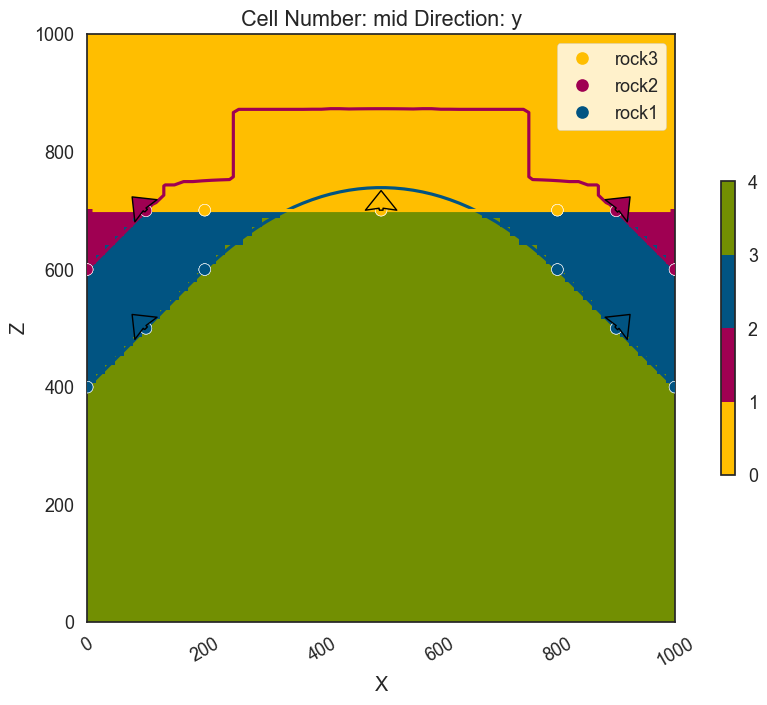

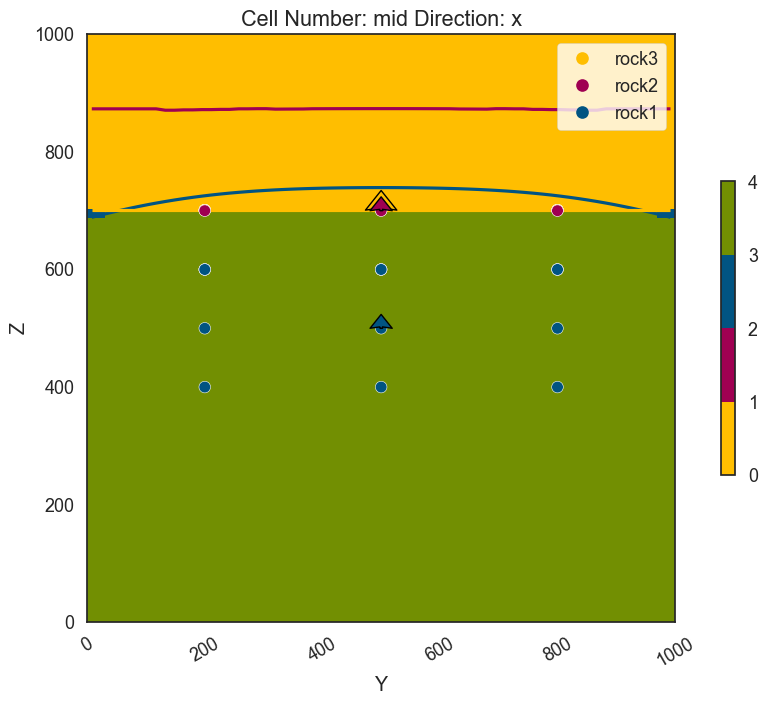

In [17]:
gpv.plot_2d(geo_data, direction='y', show_data=True)
gpv.plot_2d(geo_data, direction='x', show_data=True)
gpv.plot_3d(geo_data, direction='y')

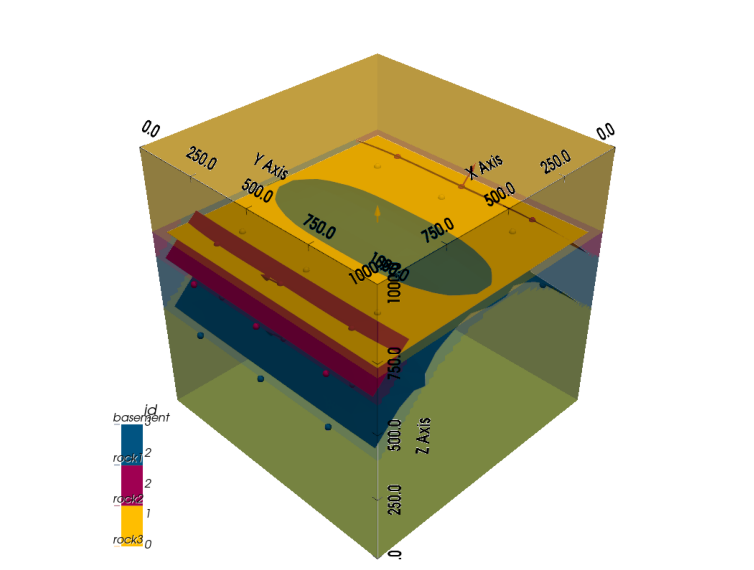

In [5]:
gpv.plot_3d(geo_data, image=True)